# Zadanie 1
Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów i mnożenia macierzy kwadratowej przez wektor z użyciem operatora *


In [22]:
function scalar_product(x,y)
    return sum(x.*y)
end

scalar_product (generic function with 1 method)

In [23]:
function multiply_matrix(matrix,vector)
    return matrix*vector
end

multiply_matrix (generic function with 1 method)

# Zadanie 2
Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora

In [120]:
#creating stucture to store execution time results

using DataFrames 
data = [50,100,300,500,750,1000]
n = length(data)*20
storage = DataFrame()

alg = String[]

c = 1

for i in 1:6
    for j in 1:10
        push!(alg , "Scalar Product")
    end

    for k in 1:10
        push!(alg , "Multiply Matrix")
    end
end



storage.algorithm = alg
storage.time = zeros(n)
storage.vector_size = zeros(n)


show(storage)




120×3 DataFrame
 Row │ algorithm        time     vector_size 
     │ String           Float64  Float64     
─────┼───────────────────────────────────────
   1 │ Scalar Product       0.0          0.0
   2 │ Scalar Product       0.0          0.0
   3 │ Scalar Product       0.0          0.0
   4 │ Scalar Product       0.0          0.0
   5 │ Scalar Product       0.0          0.0
   6 │ Scalar Product       0.0          0.0
   7 │ Scalar Product       0.0          0.0
   8 │ Scalar Product       0.0          0.0
  ⋮  │        ⋮            ⋮          ⋮
 114 │ Multiply Matrix      0.0          0.0
 115 │ Multiply Matrix      0.0          0.0
 116 │ Multiply Matrix      0.0          0.0
 117 │ Multiply Matrix      0.0          0.0
 118 │ Multiply Matrix      0.0          0.0
 119 │ Multiply Matrix      0.0          0.0
 120 │ Multiply Matrix      0.0          0.0
                             105 rows omitted

In [130]:

counter = 1
for i in 1:(length(data))
    v1 = rand(-100:100, data[i])
    v2 = rand(-100:100, data[i])
    v3 = rand(-100:100, data[i])
    matrix = rand(-100:100, data[i], data[i])
    for j in 1:10
        storage[counter , 1] = "Scalar Product"
        storage[counter , 2] = @elapsed scalar_product(v1,v2)
        storage[counter , 3] = @elapsed multiply_matrix(matrix,v3)
        storage[counter,3] = data[i]
        counter+=1
        
    end
    for k in 1:10
        storage[counter , 1] = "Multiply Matrix"
        storage[counter , 2] = @elapsed multiply_matrix(matrix,v3)
        storage[counter,3] = data[i]
        counter+=1
    end
end

show(storage)

120×3 DataFrame
 Row │ algorithm        time       vector_size 
     │ String           Float64    Float64     
─────┼─────────────────────────────────────────
   1 │ Scalar Product   2.5e-6            50.0
   2 │ Scalar Product   3.0e-7            50.0
   3 │ Scalar Product   3.0e-7            50.0
   4 │ Scalar Product   6.0e-7            50.0
   5 │ Scalar Product   1.0e-7            50.0
   6 │ Scalar Product   6.0e-7            50.0
   7 │ Scalar Product   2.0e-7            50.0
   8 │ Scalar Product   2.0e-7            50.0
  ⋮  │        ⋮             ⋮           ⋮
 114 │ Multiply Matrix  0.0007217       1000.0
 115 │ Multiply Matrix  0.000666        1000.0
 116 │ Multiply Matrix  0.0006986       1000.0
 117 │ Multiply Matrix  0.0009874       1000.0
 118 │ Multiply Matrix  0.0012542       1000.0
 119 │ Multiply Matrix  0.0012199       1000.0
 120 │ Multiply Matrix  0.0045995       1000.0
                               105 rows omitted

# Zadanie 3
Zapisywanie stworzonej struktury do pliku CSV

In [26]:
using CSV
function save_to_CSV(filename , df)
    CSV.write(filename , df)
end

save_to_CSV (generic function with 1 method)

In [131]:
save_to_CSV("time_results.csv" , storage)

"time_results.csv"

# Zadanie 4
Wczytywanie danych pliku CSV do DataFrame

In [124]:
function load_to_df(filename)
    return DataFrame(CSV.File(filename))
end

load_to_df (generic function with 1 method)

In [125]:
new_df = load_to_df("time_results.csv")
show(new_df)

120×3 DataFrame
 Row │ algorithm        time       vector_size 
     │ String15         Float64    Float64     
─────┼─────────────────────────────────────────
   1 │ Scalar Product   5.9e-6            50.0
   2 │ Scalar Product   6.0e-7            50.0
   3 │ Scalar Product   1.0e-6            50.0
   4 │ Scalar Product   4.0e-7            50.0
   5 │ Scalar Product   4.0e-7            50.0
   6 │ Scalar Product   3.0e-7            50.0
   7 │ Scalar Product   7.0e-7            50.0
   8 │ Scalar Product   3.0e-7            50.0
  ⋮  │        ⋮             ⋮           ⋮
 114 │ Multiply Matrix  0.0008389       1000.0
 115 │ Multiply Matrix  0.0008223       1000.0
 116 │ Multiply Matrix  0.0007639       1000.0
 117 │ Multiply Matrix  0.0007986       1000.0
 118 │ Multiply Matrix  0.0007619       1000.0
 119 │ Multiply Matrix  0.0006534       1000.0
 120 │ Multiply Matrix  0.0006401       1000.0
                               105 rows omitted

# Zadanie 5
Obliczanie średniej i odchylenia standardowego, narysowanie wykresów średnich czasów obliczenia operacji w zależności od rozmiaru wektora. 

In [127]:
using Statistics

mean_stats = DataFrame()
grouped = DataFrame()
grouped = groupby(new_df, :vector_size)
mean_stats = combine(grouped, "time" => mean, "multiply_matrixTime" => mean)




Row,vector_size,time_mean
,Float64,Float64
1,50.0,2.49e-6
2,100.0,5.37e-6
3,300.0,6.0075e-5
4,500.0,0.00020571
5,750.0,0.000217825
6,1000.0,0.00047296


In [31]:
std_stats = DataFrame()
std_stats = combine(grouped, "scalar_productTime" => std, "multiply_matrixTime" => std)

Row,vector_size,scalar_productTime_std,multiply_matrixTime_std
,Float64,Float64,Float64
1,50.0,0.025351,0.00166452
2,100.0,2.50333e-7,2.62679e-7
3,300.0,5.96285e-7,9.1312e-6
4,500.0,7.98332e-7,7.2975e-5
5,750.0,3.2649e-6,5.34053e-5
6,1000.0,2.2993e-6,0.000134227


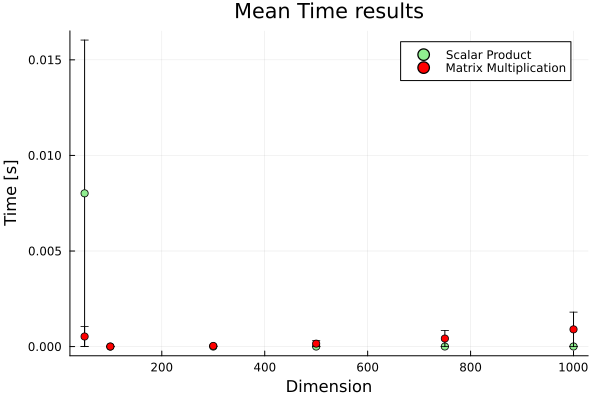

In [32]:
using Plots

p1 = scatter(data,[mean_stats.scalar_productTime_mean , mean_stats.multiply_matrixTime_mean], title = " Mean Time results " , label = ["Scalar Product" "Matrix Multiplication"],xlabel="Dimension", ylabel="Time [s]", colour= [:lightgreen :red],yerr=[mean_stats.scalar_productTime_mean mean_stats.multiply_matrixTime_mean])


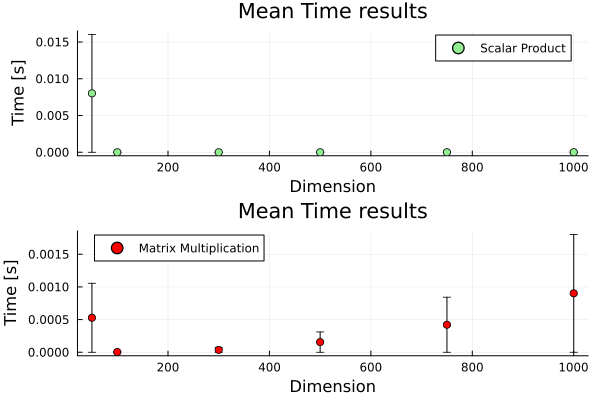

In [33]:
p1 = scatter(data,[mean_stats.scalar_productTime_mean , mean_stats.multiply_matrixTime_mean], title = " Mean Time results " , label = ["Scalar Product" "Matrix Multiplication"],xlabel="Dimension", ylabel="Time [s]", colour= [:lightgreen :red],yerr=[mean_stats.scalar_productTime_mean mean_stats.multiply_matrixTime_mean] , layout = (2,1))


# Zadanie 6
Użycie opcji layout w celu ułożenia wykresów w tabelkę


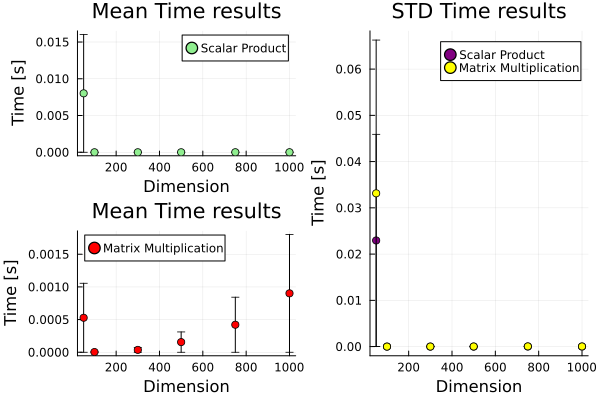

In [34]:
plot(p1,p2, layout = (1, 2))